### The demo illustrates two features of betting: (1) the probability that you win and (2) the payout you must receive to make the bet worthwhile. In this demo we will use coin flips as our random variable. I choose the P(heads) as the "winning" bet. Both biased and unbiased coin flip examples are explored along with bets with varying payouts (odds). Finally, a number of simulations are run on specific probabilities and payouts to explore results.

In [1]:
import random

import matplotlib.pyplot as plt
%matplotlib inline

In [64]:
#default is a fair coin; set prob_of_heads to desired probability (e.g. prob_of_heads = 40 for 40% success rate)
def coinFlip(prob_of_heads=50):
    flip = random.randint(1,100)
    
    if flip <= prob_of_heads: return True
    if flip >= prob_of_heads + 1: return False
    
#funds = starting account size, wager = $ risked on each bet, #numBets = total # of bets, #payout = odds (expressed as X:1)
#probOfHeads is defaulted to 50.  Heads is a "win" so vary it higher to get a more favorably biased coin
def betOnFlip(funds, wager, numBets, payout, probOfHeads=50):
    pnlCurve = list()
    for bets in range(numBets):
        if (coinFlip(probOfHeads)):
            funds += (wager * payout) - wager #payout is numerator of odds, normalized to x/y where y = 1 (e.g. 2-1 -> 2 and 5/2 -> 2.5/1 -> 2.5
            pnlCurve.append(funds)
        else: 
            funds -= wager
            pnlCurve.append(funds)
    
    return (funds, pnlCurve)

#same inputs as above with one added: numSimulations is the number of simulations to run
def flipSimulation(funds, wager, numBets, payout, numSimulations, probOfHeads=50):
    for simulations in range(numSimulations):
        newFunds, pnlCurve = betOnFlip(funds, wager, numBets, payout, probOfHeads)
        #plt.figure(num=1, figsize=(12, 8))
        plt.plot(range(numBets), pnlCurve)
    
    plt.ylabel('Account Value')
    plt.xlabel('Wager Count')
    plt.show()
    
#expected (average) return doing X betOnFlip()'s
def expReturn(funds, wager, numBets, payout, numSimulations, probOfHeads=50):
    endingFunds = list()
    for simulations in range(numSimulations):
        newFunds, _ = betOnFlip(funds, wager, numBets, payout, probOfHeads)
        endingFunds.append(newFunds)
    
    avgEndingFunds = int(sum(endingFunds)/float(len(endingFunds)))
    #plt.figure(num=1, figsize=(12, 8))
    plt.ylabel('Probability')
    plt.xlabel('Resulting Profit/Loss')
    plt.hist(endingFunds, normed=True, bins=100)
    return avgEndingFunds

    

In [65]:
funds, pnl = betOnFlip(10000, 100, 100, 2.5)
funds

14250.0

#### Simulates starting account size of 10,000 dollars, wagering 100 dollars per bet, betting 100 times, with 2:1 odds and running 1 simulation

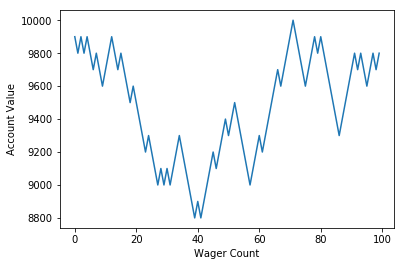

In [5]:
flipSimulation(10000, 100, 100, 2, 1)

#### Better payout this time with 2.5-1 (5-2)

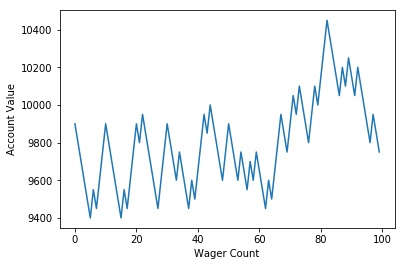

In [6]:
flipSimulation(10000, 100, 100, 2.5, 1)

### Simulation of each of the two examples above - 100 trials each

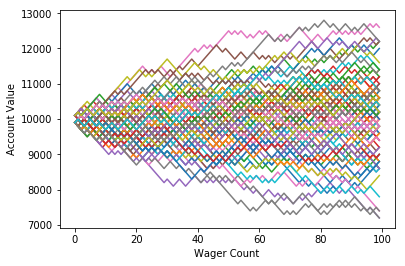

In [7]:
flipSimulation(10000, 100, 100, 2, 100)

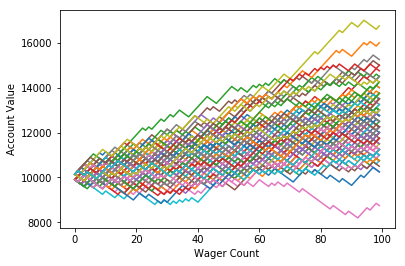

In [8]:
flipSimulation(10000, 100, 100, 2.5, 100)

#### Expected Return from running 10,000 simulations using flipSimulation() above

9996

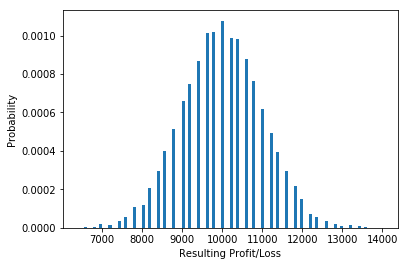

In [9]:
expReturn(10000, 100, 100, 2, 10000)

12497

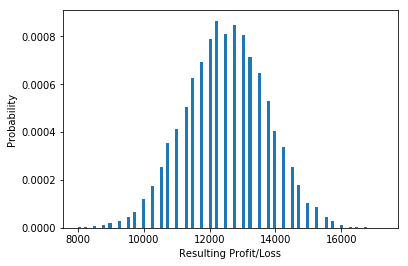

In [66]:
expReturn(10000, 100, 100, 2.5, 10000)

## What if the coin is not fair and is instead biased? P(heads) = .75

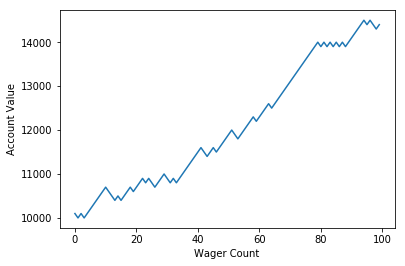

In [11]:
flipSimulation(10000, 100, 100, 2, 1, 75)

## P(heads) = .60

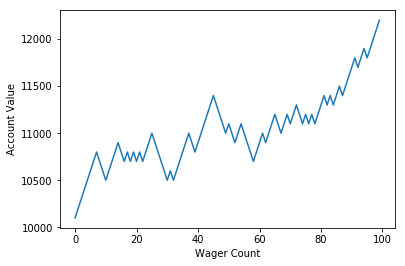

In [12]:
flipSimulation(10000, 100, 100, 2, 1, 60)

## P(heads) = .40

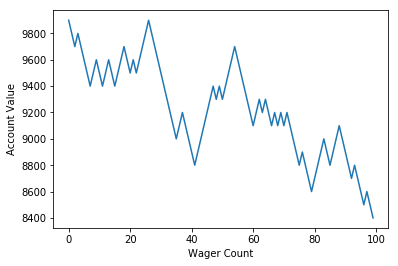

In [13]:
flipSimulation(10000, 100, 100, 2, 1, 40)

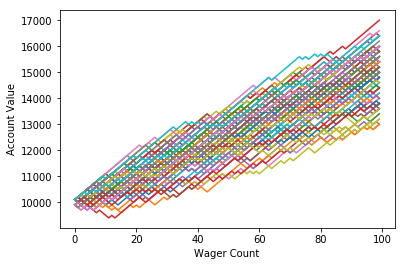

In [14]:
flipSimulation(10000, 100, 100, 2, 100, 75)

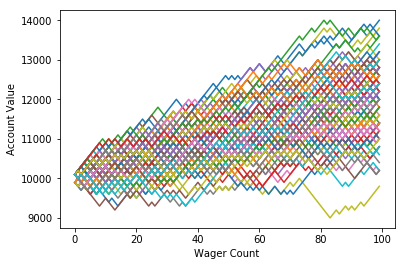

In [15]:
flipSimulation(10000, 100, 100, 2, 100, 60)

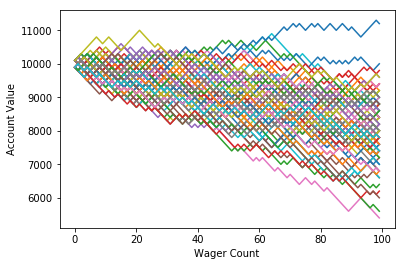

In [16]:
flipSimulation(10000, 100, 100, 2, 100, 40)

## What are break-even odds for a biased coin that is 51% in your favor

#### First, a look at a barely biased coin. P(heads) = .51  and our payout is still 2-1 (even odds)

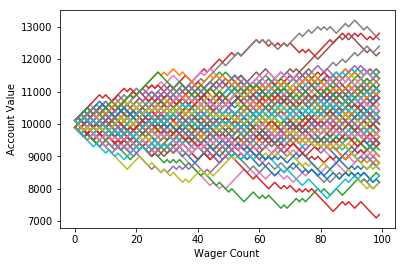

In [17]:
flipSimulation(10000, 100, 100, 2, 100, 51)

#### We see our expected return is slightly higher than 10,000

10203

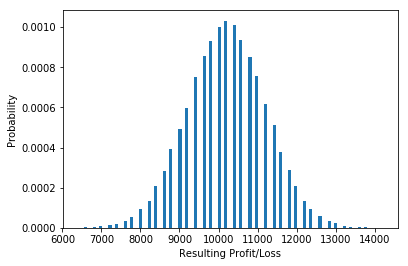

In [18]:
expReturn(10000, 100, 100, 2, 50000, 51)

### So what is the minimum payout we need on a 51% biased coin?
### It turns out we simply divide 1 by our probability so...
#### Minimum Odds Needed = 1 / P(heads)
#### For a 51% biased coin, we get 1.9608 to 1 odds as our breakeven

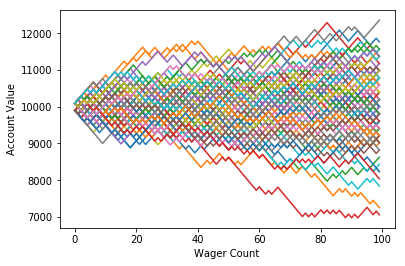

In [19]:
flipSimulation(10000, 100, 100, 1.9608, 100, 51)

#### And here we see our expected returns after 50,000 trials are much closer to breakeven (10,000 dollars)

10002

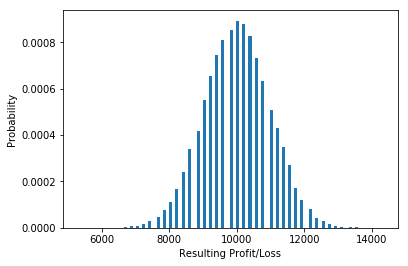

In [20]:
expReturn(10000, 100, 100, 1.9608, 50000, 51)

#### A hypothetical options strategy (high probability of winning (90%) but low odds on each trade

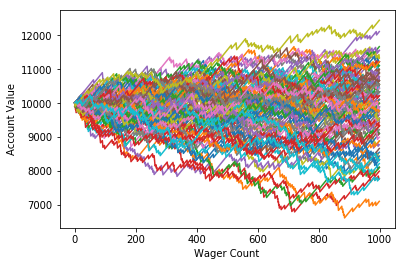

In [47]:
flipSimulation(10000, 100, 1000, 1.1111, 100, 90)

#### A hypothetical medium/high frequency trading strategy (45% probability of winning on any given trade) with odds closer to even

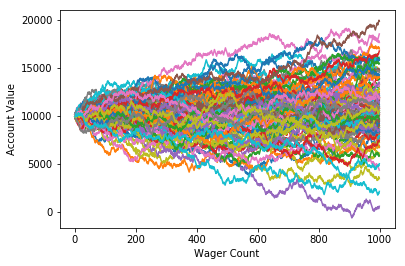

In [56]:
flipSimulation(10000, 100, 1000, 2.22, 100, 45)

### A high fequency model (10,000 trades per period), starting capital of 1 million dollars and risking 10k per trade
#### Note: simulations set to 500 - this will take ~10 seconds to run 

1048950

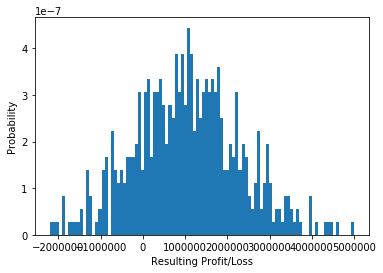

In [67]:
expReturn(1000000, 10000, 10000, 2.5, 500, 40)